# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

### Исследование данных

Импорт библиотек `pandas` и `matplotlib`, а также необходимых функций из библиотеки `sklearn`:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

Для отображения всех столбцов и строк укажем параметры:

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

Чтение csv-файла и вывод первых 10 строк обучающего датасета:

In [3]:
df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
df_train.head(10)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

Вывод информации об обучающей выборке методами `info()` и `describe()`.

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [5]:
df_train.describe(include='all')

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14149,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,14117.000000,14149.000000,14049.000000,14149.000000,14063.000000,13863.000000,14149.000000,14148.000000,14134.000000,14103.000000,14149.000000,14145.000000,14148.000000,14145.000000,14148.000000,14147.000000,14148.000000,14146.000000,14148.000000,1.414800e+04,14148.000000,14148.000000,14149.000000,14149.000000,14049.000000,14141.000000,14005.000000,14071.000000,14149.000000,14120.000000,14141.000000,14113.000000,13721.000000,14149.000000,14149.000000,14127.000000,14149.000000,14149.000000,14148.000000,14149.000000,14149.000000,14149.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14149.000000,14149.000000,13713.000000,14149.000000,14149.000000,14149.000000,14147.000000,14139.000000,12544.000000,14149.000000,13932.000000,14148.000000,14128.000000,14148.000000,14145.000000,14148.000000,14148.000000,14148.000000,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.0

Чтение csv-файла и вывод первых 10 строк тестового датасета:

In [6]:
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
df_test.head(10)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289,1250.493702,-399.746728,1199.398691,-397.50

Вывод информации о тестовой выборке методами `info()` и `describe()`.

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [8]:
df_test.describe(include='all')

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5290,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5287.000000,5289.000000,5269.000000,5290.000000,5285.000000,5290.000000,5282.000000,5265.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5287.000000,5290.000000,5288.000000,5290.000000,5281.000000,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
unique,5290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2016-12-23 05:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,1.544844e+03,-500.199527,9.371940,3.798082,489.800620,55.951097,37.716648,9.334682,13.855759,6.467745,13.922328,6.512103,1053.400166,-395.732530,1318.926879,-475.241428,1301.595477,-474.836671,1214.847960,-475.682272,1056.648995,-469.029688,997.949719,-470.482465,26.312630,-502.750897,21.949119,-501.987097,25.402926,-507.490314,2.098211e+01,-506.627916,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,NaN,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,1.247731e+02,31.045257,1.926264,0.954859,108.036326,19.081758,5.491415,1.619521,3.350852,1.065114,3.223769

Чтение csv-файла и вывод первых 10 строк исходного датасета:

In [9]:
df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
df_full.head(10)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

Вывод информации об исходных данных методами `info()` и `describe()`.

In [10]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [11]:
df_full.describe(include='all')

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19439,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,19402.000000,19439.000000,19335.000000,19439.000000,19323.000000,19069.000000,19439.000000,19435.000000,19418.000000,19377.000000,19439.000000,1.943500e+04,19438.000000,1.943500e+04,19438.000000,1.943700e+04,19438.000000,1.943600e+04,19438.000000,1.943700e+04,19437.000000,19437.000000,19439.000000,19439.000000,19339.000000,19428.000000,19294.000000,19340.000000,19439.000000,19405.000000,19431.000000,19395.000000,18986.000000,19439.000000,19439.000000,19416.000000,19439.000000,19439.000000,19438.000000,19439.000000,19439.000000,19439.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19439.000000,19439.000000,19003.000000,19439.000000,19439.000000,19439.000000,19437.000000,19427.000000,17691.000000,19439.000000,19219.000000,19438.000000,19416.000000,19438.000000,19426.000000,19438.000000,19438.000000,19438.000000,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.0

В тестовой выборке отсутствуют некоторые признаки, которые есть в обучающей,т. к. некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже.  Также в тестовом наборе нет целевых признаков.

В каждом датасете в некоторых столбцах есть пропуски. Для обучения моели, пропусков в данных быть не должно.

### Проверка эффективности обогащения

Рассчитаем эффективность обогащения на обучающей выборке и сравним получившиеся значения с `rougher.output.recovery`.

Эффективность обогащения рассчитывается по формуле:

$$ Recovery = \frac{C * (F - T)}{F * (C - T )} * 100\% $$

где:

C — доля золота в концентрате после флотации/очистки;

F — доля золота в сырье/концентрате до флотации/очистки;

T — доля золота в отвальных хвостах после флотации/очистки.

In [12]:
recovery = pd.Series((df_train['rougher.output.concentrate_au'] * (df_train['rougher.input.feed_au'] - df_train['rougher.output.tail_au']))\
/(df_train['rougher.input.feed_au'] * (df_train['rougher.output.concentrate_au'] - df_train['rougher.output.tail_au'])) * 100)

Рассчитаем `MAE` между расчётами и значением признака `rougher.output.recovery`.

In [13]:
mean_absolute_error(df_train['rougher.output.recovery'], recovery)

9.73512347450521e-15

Разница между рассчитанным значением `recovery` и `rougher.output.recovery` на обучающей выборке достаточно мала - $ 9.7 * 10^{-15} $. Т. е. эффективность обогащения рассчитана верно.

### Анализ признаков, недоступных в тестовой выборке

Рассмотрим параметры, которые есть в обучающей выборке, но не доступны в тестовой.

In [14]:
set(df_train.columns) - set(df_test.columns)

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

В тестовой выборке после этапа rougher — флотация отсутвуют характеристики - calculation — расчётные характеристики и output — параметры продукта (концентраты, хвосты и эффективность), эти данные нельзя получить сразу, т. к. они рассчитываются после прохождения этапа. По остальным этапам - primary_cleaner — первичная очистка, secondary_cleaner — вторичная очистка, final — финальные характеристики также - нет данных об output (концентраты, хвосты и эффективность).

Т. к. в тестовой выборке отсутстуют целевые признаки - `rougher.output.recovery` и `final.output.recovery` добавим их в выборку.

In [15]:
df_test = df_test.merge(df_full[['date', 'rougher.output.recovery', 'final.output.recovery']], how='left', on='date')

В обучающей выборке удалим параметры, которых нет в тестовой выборке.

In [16]:
df_train = df_train.drop(set(df_train.columns) - set(df_test.columns), axis=1)

### Предобработка данных

Сначала рассмотрим отсутсвующие значения в исходной таблице `df_full`.

In [17]:
df_full.isna().sum()

date                                                     0
final.output.concentrate_ag                              1
final.output.concentrate_pb                              1
final.output.concentrate_sol                           211
final.output.concentrate_au                              0
final.output.recovery                                    0
final.output.tail_ag                                     1
final.output.tail_pb                                   101
final.output.tail_sol                                    6
final.output.tail_au                                     0
primary_cleaner.input.sulfate                           24
primary_cleaner.input.depressant                        37
primary_cleaner.input.feed_size                          0
primary_cleaner.input.xanthate                         104
primary_cleaner.output.concentrate_ag                    0
primary_cleaner.output.concentrate_pb                  116
primary_cleaner.output.concentrate_sol                 3

Во многих столбцах датасета есть пропуски, заменим их соседним по времени значением с помощью метода `ffil()`.

In [18]:
df_full.loc[:, 'final.output.concentrate_ag':] = df_full.loc[:, 'final.output.concentrate_ag':].ffill(axis=1)

Проверим количество пропусков после замены.

In [19]:
df_full.isna().sum()

date                                                  0
final.output.concentrate_ag                           1
final.output.concentrate_pb                           1
final.output.concentrate_sol                          0
final.output.concentrate_au                           0
final.output.recovery                                 0
final.output.tail_ag                                  0
final.output.tail_pb                                  0
final.output.tail_sol                                 0
final.output.tail_au                                  0
primary_cleaner.input.sulfate                         0
primary_cleaner.input.depressant                      0
primary_cleaner.input.feed_size                       0
primary_cleaner.input.xanthate                        0
primary_cleaner.output.concentrate_ag                 0
primary_cleaner.output.concentrate_pb                 0
primary_cleaner.output.concentrate_sol                0
primary_cleaner.output.concentrate_au           

Все пропуски в исходном датасете заменены.

Заменим пропуски в датасете `df_train`. Заменим столбцы на измененные столбцы исходного датасета `df_full`.

In [20]:
df_train = pd.DataFrame(df_train['date'])
df_train = df_train.merge(df_full[list(df_test.columns)], how='left', on='date')

Убедимся, что все пропуски удалены.

In [21]:
df_train.isna().sum()

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

Заменим пропуски в датасете `df_test`. Заменим столбцы на измененные столбцы исходного датасета `df_full`.

In [22]:
df_test = pd.DataFrame(df_test['date'])
df_test = df_test.merge(df_full[list(df_train.columns)], how='left', on='date')

Проверим количество пропусков после замены.

In [23]:
df_test.isna().sum()

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

## Анализ данных

### Изменение концентрации металлов (Au, Ag, Pb) на различных этапах очистки

Расмотрим изменение концентрации золота - Au на каждом этапе очистки.

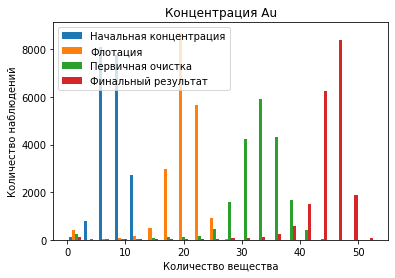

In [24]:
plt.hist(df_full[['rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']], bins=20)
plt.title('Концентрация Au')
plt.legend(['Начальная концентрация', 'Флотация', 'Первичная очистка', 'Финальный результат'], loc='upper left')
plt.xlabel('Количество вещества')
plt.ylabel('Количество наблюдений')
plt.show()

На графике видно, что с каждым этапом концентрация золота увеличивается.

Расмотрим изменение концентрации серебра - Ag на каждом этапе очистки.

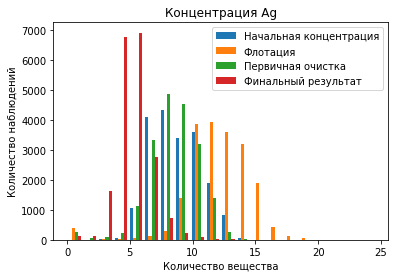

In [25]:
plt.hist(df_full[['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']], bins=20)
plt.title('Концентрация Ag')
plt.legend(['Начальная концентрация', 'Флотация', 'Первичная очистка', 'Финальный результат'], loc='upper right')
plt.xlabel('Количество вещества')
plt.ylabel('Количество наблюдений')
plt.show()

Наибольшая концентрация серебра - на первом этапе - флотации. К последнему этапу концентрация серебра в продукте уменьшается.

Расмотрим изменение концентрации свинца - Pb на каждом этапе очистки.

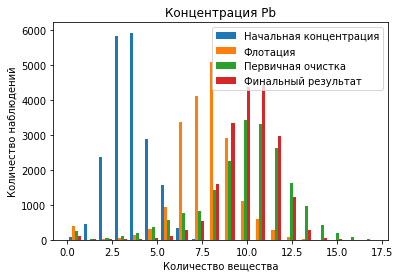

In [26]:
plt.hist(df_full[['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']], bins=20)
plt.title('Концентрация Pb')
plt.legend(['Начальная концентрация', 'Флотация', 'Первичная очистка', 'Финальный результат'], loc='upper right')
plt.xlabel('Количество вещества')
plt.ylabel('Количество наблюдений')
plt.show()

Концентрация свинца с на каждом этапе очистки немного увеличивается.

На графиках видно, что наибольшая концентрация в продукте - золота. На финальном этапе концетрация свинца больше концентрации серебра. Также на каждом графике есть значения равные 0.

### Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках.

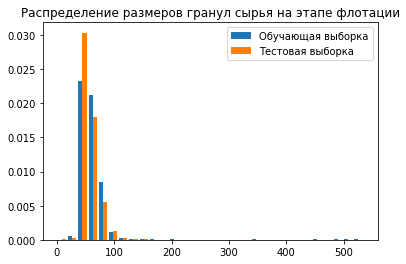

In [27]:
plt.hist([df_train['rougher.input.feed_size'], df_test['rougher.input.feed_size']], bins=30, density = True)
plt.title('Распределение размеров гранул сырья на этапе флотации')
plt.legend(['Обучающая выборка', 'Тестовая выборка'], loc='upper right')
plt.show()

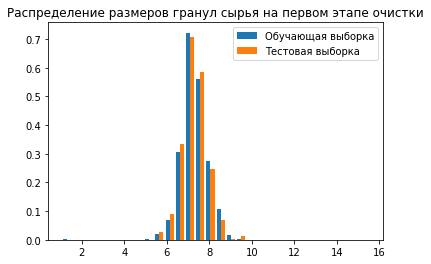

In [28]:
plt.hist([df_train['primary_cleaner.input.feed_size'], df_test['primary_cleaner.input.feed_size']], bins=30, density = True)
plt.title('Распределение размеров гранул сырья на первом этапе очистки')
plt.legend(['Обучающая выборка', 'Тестовая выборка'], loc='upper right')
plt.show()

Также методом `describe()` выведем характеристики размеров гранул сырья на этапах флотации и очистки на обучающей выборке.

In [29]:
df_train[['rougher.input.feed_size', 'primary_cleaner.input.feed_size']].describe()

,rougher.input.feed_size,primary_cleaner.input.feed_size
count,14149.000000,14149.000000
mean,64.221276,7.322310
std,47.262870,0.614062
min,0.136059,1.080000
25%,48.990600,6.960000
50%,55.509894,7.290000
75%,66.550684,7.700000
max,534.265342,10.470000


Характеристики размеров гранул сырья на этапах флотации и очистки на тестовой выборке.

In [30]:
df_test[['rougher.input.feed_size', 'primary_cleaner.input.feed_size']].describe()

,rougher.input.feed_size,primary_cleaner.input.feed_size
count,5290.000000,5290.000000
mean,55.941544,7.266339
std,19.092602,0.610219
min,0.046369,5.650000
25%,43.905687,6.890000
50%,50.834264,7.250000
75%,62.425276,7.600000
max,392.494040,15.500000


На графиках видно, что распределения выборок похожи. Также средние значения обеих выборок отличаются не сильно.

### Исследование суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах

В исходный датасет `df_full` добавим столбцы с суммарной концентрацией всех веществ на разных стадиях.

In [31]:
df_full['sum_raw'] = df_full['rougher.input.feed_au'] + df_full['rougher.input.feed_ag']\
         + df_full['rougher.input.feed_pb'] + df_full['rougher.input.feed_sol']
df_full['sum_rougher'] = df_full['rougher.output.concentrate_au'] + df_full['rougher.output.concentrate_ag']\
         + df_full['rougher.output.concentrate_pb'] + df_full['rougher.output.concentrate_sol']
df_full['sum_final'] = df_full['final.output.concentrate_au'] + df_full['final.output.concentrate_ag']\
         + df_full['final.output.concentrate_pb'] + df_full['final.output.concentrate_sol']

Построим гистограмму для всех этапов.

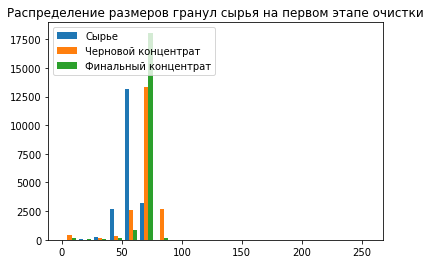

In [32]:
plt.hist(df_full[['sum_raw', 'sum_rougher', 'sum_final']], bins=20)
plt.title('Распределение размеров гранул сырья на первом этапе очистки')
plt.legend(['Сырье', 'Черновой концентрат', 'Финальный концентрат'], loc='upper left')
plt.show()

На графике видно, что на каждой стадии есть небольшие значения суммарной концентрации, а также значения равные 0.

Рассмотрим также диаграмму размаха для суммарной концентрации веществ на каждом этапе.

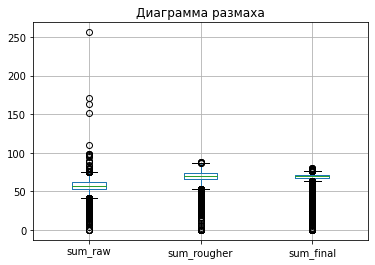

In [33]:
df_full.boxplot(['sum_raw', 'sum_rougher', 'sum_final'])
plt.figsize = (12, 6)
plt.title('Диаграмма размаха')
plt.show()

На каждом этапе среди значений суммарной концентрации есть аномальные. Оставим те строки, где значение концентрации больше 25 и меньше 90.

In [34]:
df_full = df_full[(df_full['sum_raw'] >= 25) & (df_full['sum_raw'] <= 90)]

In [35]:
df_full = df_full[(df_full['sum_rougher'] >= 25) & (df_full['sum_rougher'] <= 90)]

In [36]:
df_full = df_full[(df_full['sum_final'] >= 25) & (df_full['sum_final'] <= 90)]

Удалим эти же строки в обучающей выборке.

In [37]:
df_train = df_train.merge(df_full['date'], how='inner', on='date')

## Модель

### Подготовка данных

Удалим столбец `date` из обучающей и тестовой выборок.

In [38]:
df_train = df_train.drop('date', axis=1)

In [39]:
df_test = df_test.drop('date', axis=1)

Разделим датасеты на `features` - признаки и `target` - целевой признак.

In [40]:
features_train = df_train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_train_rougher = df_train['rougher.output.recovery']
target_train_final = df_train['final.output.recovery']

In [41]:
features_test = df_test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_test_rougher = df_test['rougher.output.recovery']
target_test_final = df_test['final.output.recovery']

Так как в данных присутствуют колличественные признаки с разными разбросами значений, масштабируем признаки. Стандартизируем признаки с помощью `StandardScaler`.

In [42]:
pd.options.mode.chained_assignment = None

scaler = StandardScaler()
scaler.fit(features_train)

features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)

### Функция для вычисления итоговой sMAPE

Напишем функцию для расчета sMAPE (симметричное среднее абсолютное процентное отклонение).

In [43]:
def smape(target, predictions):
    predictions = pd.Series(predictions)
    score = 1/target.shape[0] * (abs(target - predictions)/((abs(target) + abs(predictions))/2)).sum() * 100
    return score

### Обучение модели и оценка качества

Рассмотрим первую модель - дерево решений в регрессии. С помощью `GridSearchCV()` будем перебирать гиперпараметр `max_depth` - глубина дерева, также используем кросс-валидацию с параметром `cv=5`.

Сначала обучим модель для предсказания признака `rougher.output.recovery`.

In [44]:
%%time

dtr_model_rougher = DecisionTreeRegressor(random_state=12345)
dtr_parametrs_rougher = {'max_depth': range(1, 11)}
dtr_grid_rougher = GridSearchCV(dtr_model_rougher, dtr_parametrs_rougher, scoring=make_scorer(smape, greater_is_better=False), cv=5)
dtr_grid_rougher.fit(features_train, target_train_rougher)
print('Средняя оценка качества лучшей модели:', abs(dtr_grid_rougher.best_score_))
print("Глубина дерева:", dtr_grid_rougher.best_params_['max_depth'])

Средняя оценка качества лучшей модели: 1.5305056205511025
Глубина дерева: 2
CPU times: user 14.7 s, sys: 12.3 ms, total: 14.7 s
Wall time: 14.7 s


Теперь обучим модель для предсказания признака `final.output.recovery`.

In [45]:
%%time

dtr_model_final = DecisionTreeRegressor(random_state=12345)
dtr_parametrs_final = {'max_depth': range(1, 11)}
dtr_grid_final = GridSearchCV(dtr_model_final, dtr_parametrs_final, scoring=make_scorer(smape, greater_is_better=False), cv=5)
dtr_grid_final.fit(features_train, target_train_final)
print('Средняя оценка качества лучшей модели:', abs(dtr_grid_final.best_score_))
print("Глубина дерева:", dtr_grid_final.best_params_['max_depth'])

Средняя оценка качества лучшей модели: 1.892252041880973
Глубина дерева: 1
CPU times: user 14.7 s, sys: 13.8 ms, total: 14.8 s
Wall time: 16.8 s


Рассмотрим вторую модель - случайный лес в регрессии. С помощью `GridSearchCV()` будем перебирать гиперпараметры `max_depth` - глубина дерева и `n_estimators` - количество деревьев, также используем кросс-валидацию с параметром `cv=5`.

Сначала обучим модель для предсказания признака `rougher.output.recovery`.

In [46]:
%%time

rfr_model_rougher = RandomForestRegressor(random_state=12345)
rfr_parametrs_rougher = {'n_estimators': range(10, 61, 5), 'max_depth': range(1, 11)} # n_estimators': range(10, 61, 5)
rfr_grid_rougher = GridSearchCV(rfr_model_rougher, rfr_parametrs_rougher, scoring=make_scorer(smape, greater_is_better=False), cv=5)
rfr_grid_rougher.fit(features_train, target_train_rougher)
print('Средняя оценка качества лучшей модели:', abs(rfr_grid_rougher.best_score_))
print("Количество деревьев:", rfr_grid_rougher.best_params_['n_estimators'], 
      "Глубина дерева:", rfr_grid_rougher.best_params_['max_depth'])

Средняя оценка качества лучшей модели: 1.6468604500926745
Количество деревьев: 25 Глубина дерева: 6
CPU times: user 55min 8s, sys: 4.19 s, total: 55min 12s
Wall time: 55min 19s


Теперь обучим модель для предсказания признака `final.output.recovery`.

In [47]:
%%time

rfr_model_final = RandomForestRegressor(random_state=12345)
rfr_parametrs_final = {'n_estimators': range(10, 61, 5), 'max_depth': range(1, 11)} # 'n_estimators': range(10, 61, 5)
rfr_grid_final = GridSearchCV(rfr_model_final, rfr_parametrs_final, scoring=make_scorer(smape, greater_is_better=False), cv=5)
rfr_grid_final.fit(features_train, target_train_final)
print('Средняя оценка качества лучшей модели:', abs(rfr_grid_final.best_score_))
print("Количество деревьев:", rfr_grid_final.best_params_['n_estimators'], 
      "Глубина дерева:", rfr_grid_final.best_params_['max_depth'])

Средняя оценка качества лучшей модели: 1.7357865018828746
Количество деревьев: 50 Глубина дерева: 10
CPU times: user 55min 54s, sys: 4.07 s, total: 55min 58s
Wall time: 56min


Рассмотрим третью модель - линейная регрессия. Для оценки модели используем кросс-валидацию с параметром `cv=5`.

Сначала обучим модель для предсказания признака `rougher.output.recovery`.

In [48]:
lr_model_rougher = LinearRegression()
lr_model_rougher.fit(features_train, target_train_rougher)
scores_rougher = cross_val_score(lr_model_rougher, features_train, target_train_rougher, cv=5, 
                                 scoring=make_scorer(smape, greater_is_better=False))
score_rougher = abs(scores_rougher).mean()
print('Средняя оценка качества модели:', score_rougher)

Средняя оценка качества модели: 1.6612405243140838


Теперь обучим модель для предсказания признака `final.output.recovery`.

In [49]:
lr_model_final = LinearRegression()
lr_model_rougher.fit(features_train, target_train_final)
scores_final = cross_val_score(lr_model_final, features_train, target_train_final, cv=5, 
                               scoring=make_scorer(smape, greater_is_better=False))
score_final = abs(scores_final).mean()
print('Средняя оценка качества модели:', score_final)

Средняя оценка качества модели: 2.361156475563094


Рассчитаем итоговую оценку sMAPE по лучшим показателям sMAPE моделей для двух признаков `rougher.output.recovery` и `final.output.recovery`.

In [50]:
print('Итоговая оценка sMAPE для обучающей выборки:', 0.25 * abs(dtr_grid_rougher.best_score_) + 0.75 * abs(rfr_grid_final.best_score_))

Итоговая оценка sMAPE для обучающей выборки: 1.6844662815499316


### Тестирование модели

Проверим лучшие модели на тестовой выборке. Для предсказания признака `rougher.output.recovery` лучшая модель - решающее дерево с гиперпараметрами `max_depth=2`, для `final.output.recovery` - случайный лес с гиперпараметрами `n_estimators=50` и `max_depth=10`.

Получим предсказания признака `rougher.output.recovery` и оценку sMAPE.

In [51]:
predictions_rougher = dtr_grid_rougher.best_estimator_.predict(features_test)
result_rougher = smape(target_test_rougher, predictions_rougher)
print('sMAPE признака rougher.output.recovery:', result_rougher)

sMAPE признака rougher.output.recovery: 8.463735973521443


Получим предсказания признака `final.output.recovery` и оценку sMAPE.

In [52]:
predictions_final = rfr_grid_final.best_estimator_.predict(features_test)
result_final = smape(target_test_final, predictions_final)
print('sMAPE признака final.output.recovery:', result_final)

sMAPE признака final.output.recovery: 9.48243021778889


Рассчитаем итоговую оценку sMAPE для двух признаков `rougher.output.recovery` и `final.output.recovery` для тестовой выборки.

In [53]:
print('Итоговая оценка sMAPE для тестовой выборки:', 0.25 * result_rougher + 0.75 * result_final)

Итоговая оценка sMAPE для тестовой выборки: 9.227756656722029


На тестовой выборке оценка sMAPE больше, чем на обучающей.

Сравним модель случайного леса с константной моделью, в качестве предсказаний будем использовать медиану целевого признака тестовой выборки.

In [54]:
dr_model_rougher = DummyRegressor(strategy='median')
dr_model_rougher.fit(features_train, target_train_rougher)
dr_predictions_rougher = dr_model_rougher.predict(features_test)
dr_result_rougher = smape(target_test_rougher, dr_predictions_rougher)
print('sMAPE признака rougher.output.recovery константной модели:', dr_result_rougher)

sMAPE признака rougher.output.recovery константной модели: 8.514330562830581


In [55]:
dr_model_final = DummyRegressor(strategy='median')
dr_model_final.fit(features_train, target_train_final)
dr_predictions_final = dr_model_final.predict(features_test)
dr_result_final = smape(target_test_final, dr_predictions_final)
print('sMAPE признака final.output.recovery константной модели:', dr_result_final)

sMAPE признака final.output.recovery константной модели: 9.742024628600806


Рассчитаем итоговую оценку sMAPE для двух признаков `rougher.output.recovery` и `final.output.recovery` для тестовой выборки константной модели.

In [56]:
print('Итоговая оценка sMAPE для тестовой выборки:', 0.25 * dr_result_rougher + 0.75 * dr_result_final)

Итоговая оценка sMAPE для тестовой выборки: 9.43510111215825


Итоговая оценка константой модели больше, чем совместная оценка моделей решающего дерева и случайного леса.

## Общий вывод

В результате исследования были выполнены следующие шаги: подготовка данных, анализ данных и моделирование.

На этапе подготовки данных были изучены данные. Был проверен расчет эффективности обогащения на обучающей выборке, расчеты и данные в соответствующем столбце совпали. В тестовой выборке были не все признаки, которые были в обущающей. Признаки были недоступны, т. к. они рассчитываются после определенных этапов. В результате в тестовую выборку были добавлены целевые признаки, а из обучающей выборки были удалены столбцы, которых не было в тестовой. Также данные были предобработаны, т. к. в некотрых столбцах были пропуски. Пропуски были заменены среднесуточным значением, строки, где заполнить пропуски средним не удалось, были удалены. В тестовой и обучающей выборках были устранены все пропуски, т. к. модель не смогла бы обучиться.

На этапе анализа данных была проанализирована концентрация металлов (Au, Ag, Pb) на различных этапах очистки. С каждым этапом концентрация золота в продукте увеличивается. Также было проведено сравнение распределения размеров гранул сырья на обучающей и тестовой выборках, распределения выборок примерно одинаковые. Исследована суммарная концентрация всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. Некоторые суммарные концентрации были равны 0, это аномальные значения и эти строки были удалены из всех выборок.

Для обучения модели из выборок был удален столбец date, т. к. на целевые признаки он не влияет, выборки были разделены на признаки и целевые признаки, также признаки были масштабированы. Была написана функция для расчета метрики sMAPE. Было обучено и проверено несколько моделей - решающее дерево, случайный лес и линейная регрессия. Для предсказания признака rougher.output.recovery лучшая модель - случайный лес с гиперпараметрами n_estimators=15 и max_depth=10, для final.output.recovery - случайный лес с гиперпараметрами n_estimators=15 и max_depth=7. Обе модели были проверены на тестовой выборке. sMAPE признака rougher.output.recovery - 8.3, final.output.recovery - 10.2. Итоговая оценка sMAPE для тестовой выборки: 9.7. Метрики на тестовой выборке больше, чем на обучающей. Также модели были сравнены с константной моделью, предсказывающей медиану.

Значения метрик и качество модели достаточно хорошие, модель можно применять для предсказания коэффициента восстановления золота из золотосодержащей руды.